In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import category_encoders as ce
from matplotlib import pyplot

In [61]:
df = pd.read_csv("../data/final_data.csv")
df

,number,incident_state,reassignment_count,reopen_count,sys_mod_count,made_sla,impact,priority,knowledge,u_priority_confirmation,assignment_group,category,subcategory,time_taken_since_open,time_from_prev,time_req_to_close
0,INC0000045,New,0,0,0,True,2,3,True,False,Group 56,Category 55,Subcategory 170,7.0,7.0,7837.0
1,INC0000045,Resolved,0,0,2,True,2,3,True,False,Group 56,Category 55,Subcategory 170,457.0,450.0,7387.0
2,INC0000045,Resolved,0,0,3,True,2,3,True,False,Group 56,Category 55,Subcategory 170,613.0,156.0,7231.0
3,INC0000047,New,0,0,0,True,2,3,True,False,Group 70,Category 40,Subcategory 215,17.0,17.0,8943.0
4,INC0000047,Active,1,0,1,True,2,3,True,False,Group 24,Category 40,Subcategory 215,50.0,33.0,8910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116789,INC0120835,Active,1,0,1,True,2,3,False,False,Group 31,Category 42,Subcategory 223,2.0,2.0,42.0
116790,INC0120835,Resolved,1,0,3,True,2,3,False,True,Group 31,Category 42,Subcategory 223,44.0,42.0,0.0
116791,INC0121064,Active,0,0,0,True,2,3,False,False,Group 70,Category 42,Subcategory 223,0.0,0.0,141.0
116792,INC0121064,Active,1,0,1,True,2,3,False,False,Group 31,Category 42,Subcategory 223,63.0,63.0,78.0


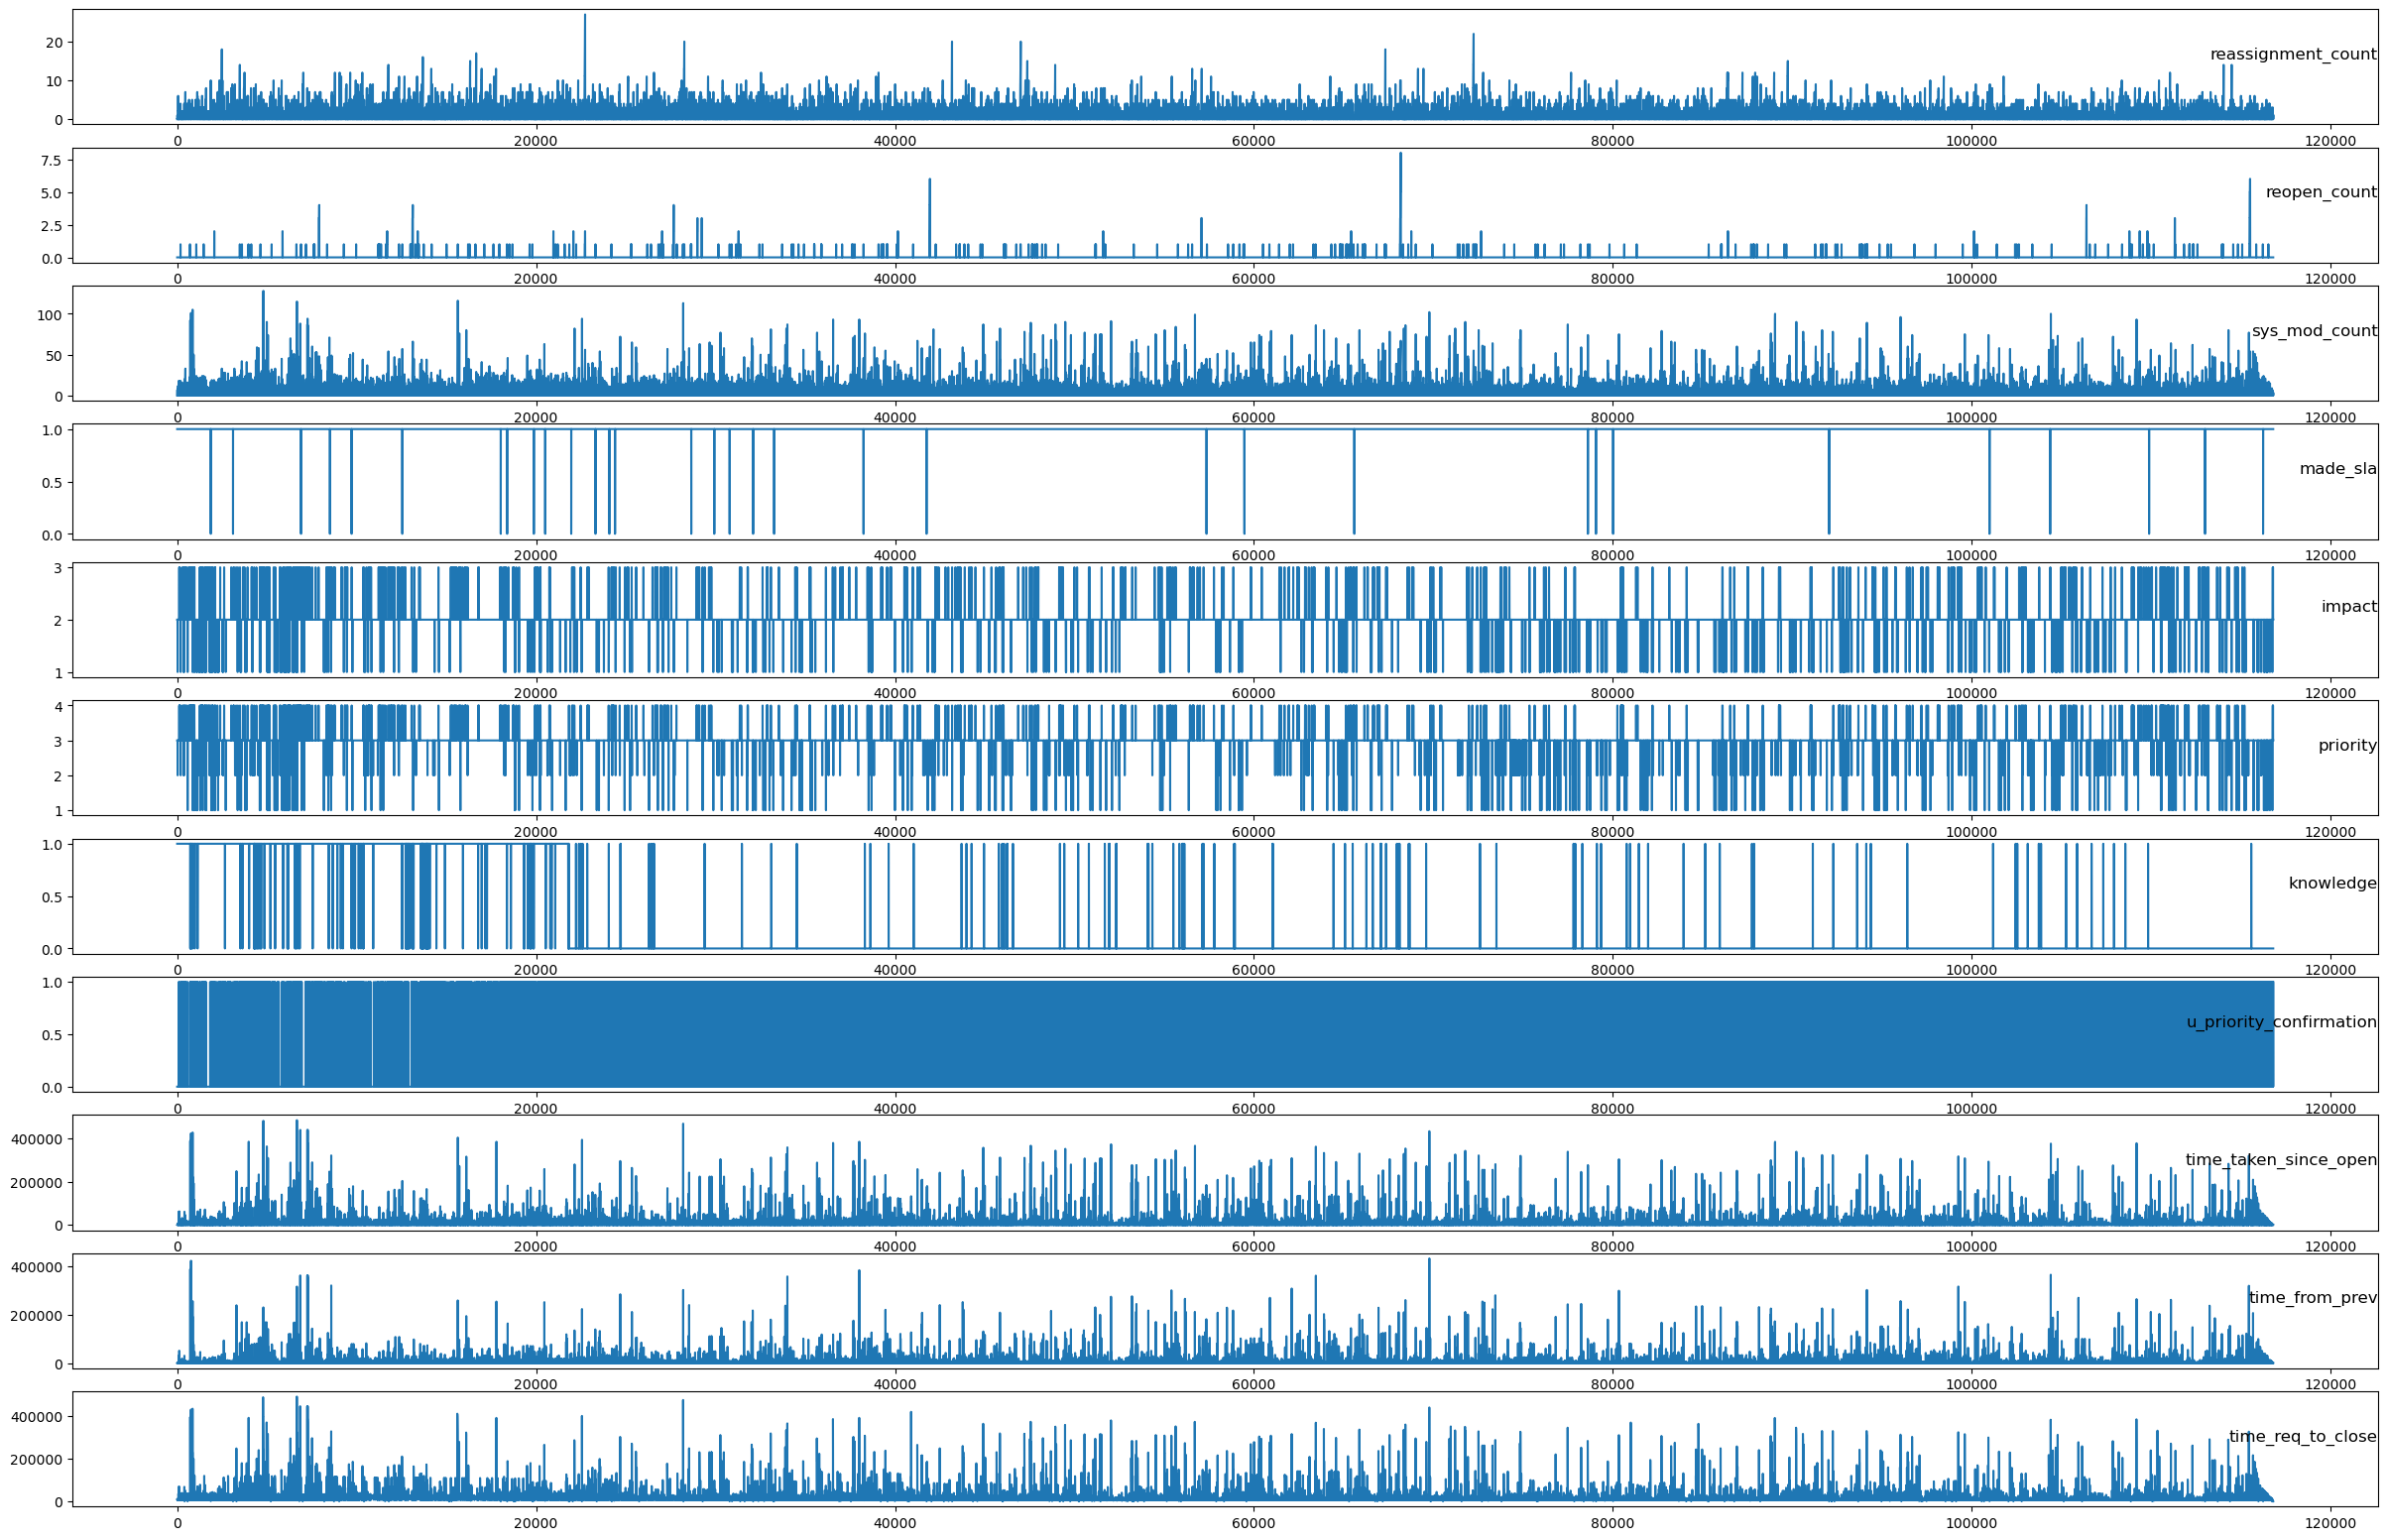

In [62]:
# plot each column
pyplot.figure(figsize=(30, 20), dpi=100)
groups= ['reassignment_count', 'reopen_count',
       'sys_mod_count', 'made_sla', 'impact', 'priority', 'knowledge',
       'u_priority_confirmation', 'time_taken_since_open', 'time_from_prev',
       'time_req_to_close']
i=1
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(df[[group]])
	pyplot.title(group, y=0.5, loc='right')
	i += 1
pyplot.show()

In [63]:
time_steps = df.groupby("number").size().max()
time_steps

57

In [64]:
cols = df.columns.tolist()

In [65]:
mdf= pd.concat([
    d.reset_index(drop=True).reindex(range(time_steps)).assign(number=n)
    for n, d in df.groupby('number')
], ignore_index=True)
mdf=mdf.fillna(0)

In [66]:
#Split data into train test
test_rows = 2491*time_steps #10% data for testing
values=mdf.values
train_rows=values.shape[0] - test_rows

train = mdf.iloc[:train_rows, :].copy()
test = mdf.iloc[train_rows:, :].copy()

rbs = StandardScaler()
be = ce.BinaryEncoder()
float_col_list = ['reassignment_count', 'reopen_count',
       'sys_mod_count', 'made_sla', 'impact', 'priority', 'knowledge',
       'u_priority_confirmation', 'time_taken_since_open', 'time_from_prev',
       'time_req_to_close']


train.loc[:,float_col_list]=rbs.fit_transform(train.loc[:,float_col_list])
train = be.fit_transform(train.iloc[:,1:])

test.loc[:,float_col_list]=rbs.transform(test.loc[:,float_col_list])
test = be.transform(test.iloc[:,1:])

test

,incident_state_0,incident_state_1,incident_state_2,incident_state_3,reassignment_count,reopen_count,sys_mod_count,made_sla,impact,priority,...,subcategory_1,subcategory_2,subcategory_3,subcategory_4,subcategory_5,subcategory_6,subcategory_7,time_taken_since_open,time_from_prev,time_req_to_close
1278339,0,0,0,1,-0.158981,-0.031107,-0.156768,3.326244,3.298149,3.333375,...,1,1,0,1,0,0,0,-0.083645,-0.052166,0.624291
1278340,0,1,0,1,-0.158981,-0.031107,0.238219,3.326244,3.298149,3.333375,...,1,1,0,1,0,0,0,-0.016733,0.093900,0.575689
1278341,0,1,0,0,-0.158981,-0.031107,0.633205,3.326244,3.298149,3.333375,...,1,1,0,1,0,0,0,0.006747,-0.002275,0.558633
1278342,0,1,0,0,-0.158981,-0.031107,1.028191,3.326244,3.298149,3.333375,...,1,1,0,1,0,0,0,0.007155,-0.053368,0.558338
1278343,0,0,1,0,-0.158981,-0.031107,1.423177,3.326244,3.298149,3.333375,...,1,1,0,1,0,0,0,0.007155,-0.054270,0.558338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420321,0,0,1,1,-0.158981,-0.031107,-0.156768,-0.300639,-0.298617,-0.298651,...,0,0,0,0,0,1,0,-0.084595,-0.054270,-0.153057
1420322,0,0,1,1,-0.158981,-0.031107,-0.156768,-0.300639,-0.298617,-0.298651,...,0,0,0,0,0,1,0,-0.084595,-0.054270,-0.153057
1420323,0,0,1,1,-0.158981,-0.031107,-0.156768,-0.300639,-0.298617,-0.298651,...,0,0,0,0,0,1,0,-0.084595,-0.054270,-0.153057
1420324,0,0,1,1,-0.158981,-0.031107,-0.156768,-0.300639,-0.298617,-0.298651,...,0,0,0,0,0,1,0,-0.084595,-0.054270,-0.153057


In [67]:
train_values = train.values
test_values = test.values

# split into input and outputs
train_X, train_y = train_values[:, :-1], train_values[:, -1]
test_X, test_y = test_values[:, :-1], test_values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((-1, time_steps, train_X.shape[1]))
train_y = train_y.reshape((-1,time_steps,1))
test_X = test_X.reshape((-1, time_steps, test_X.shape[1]))
test_y = test_y.reshape((-1,time_steps,1))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(22427, 57, 35) (22427, 57, 1) (2491, 57, 35) (2491, 57, 1)


In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import concatenate

In [69]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


In [70]:
...
# design network
model = keras.Sequential()
model.add(layers.Bidirectional(layers.LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True)))
model.add(layers.LSTM(64,return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(20))
model.add(layers.Dense(128))
model.add(layers.Dense(time_steps))
model.compile(loss='mse', optimizer='adam', metrics=[
              'mae', 'mape'])

""" model = keras.Sequential()
model.add(layers.Bidirectional(layers.LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True)))

model.add(layers.BatchNormalization())
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(256, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(512, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(1024, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(512, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(256, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(128, return_sequences=True ))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(32))
model.add(layers.Dense(128))
model.add(layers.Dense(time_steps))
model.compile(loss='mse', optimizer='adam', metrics=[
              'mae', 'mape']) """
model.build(train_X.shape)


print(model.summary())

early_stopping = keras.callbacks.EarlyStopping(patience=42)
model_checkpoint = keras.callbacks.ModelCheckpoint("model/model1_prev_minmax_weights_best.h5", monitor='val_loss', verbose=0, save_best_only=True,
                                                   mode='auto')
                                                
lr_reducer = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,
                                               mode='auto', epsilon=0.0001, cooldown=0, min_lr=0)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_10 (Bidirectio (22427, 57, 256)          167936    
_________________________________________________________________
lstm_96 (LSTM)               (22427, 57, 64)           82176     
_________________________________________________________________
dropout_47 (Dropout)         (22427, 57, 64)           0         
_________________________________________________________________
lstm_97 (LSTM)               (22427, 57, 32)           12416     
_________________________________________________________________
lstm_98 (LSTM)               (22427, 57, 32)           8320      
_________________________________________________________________
dropout_48 (Dropout)         (22427, 57, 32)           0         
_________________________________________________________________
lstm_99 (LSTM)               (22427, 20)             

In [71]:
# fit network
#history = model.fit(train_X, train_y, epochs=100, batch_size=128, validation_data=(test_X, test_y), verbose=1, shuffle=False)

# fit network

history = model.fit(train_X, train_y, epochs=500, batch_size=64, validation_data=(test_X, test_y),
                    shuffle=False, callbacks=[early_stopping, model_checkpoint, lr_reducer])

Epoch 1/500
351/351 [==============================] - 16s 30ms/step - loss: 0.8147 - mae: 0.1687 - mape: 52.6146 - val_loss: 0.4568 - val_mae: 0.1162 - val_mape: 31.5645
Epoch 2/500
351/351 [==============================] - 9s 26ms/step - loss: 0.7595 - mae: 0.1450 - mape: 39.2161 - val_loss: 0.5140 - val_mae: 0.0995 - val_mape: 22.2524
Epoch 3/500
351/351 [==============================] - 9s 26ms/step - loss: 0.7270 - mae: 0.1417 - mape: 39.0749 - val_loss: 0.2975 - val_mae: 0.0965 - val_mape: 29.8517
Epoch 4/500
351/351 [==============================] - 9s 26ms/step - loss: 0.5102 - mae: 0.1333 - mape: 40.1123 - val_loss: 0.2559 - val_mae: 0.0792 - val_mape: 24.6652
Epoch 5/500
351/351 [==============================] - 9s 26ms/step - loss: 0.4356 - mae: 0.1135 - mape: 33.4040 - val_loss: 0.2705 - val_mae: 0.0735 - val_mape: 19.9211
Epoch 6/500
351/351 [==============================] - 9s 26ms/step - loss: 0.3805 - mae: 0.1043 - mape: 31.4250 - val_loss: 0.2228 - val_mae: 0.0725

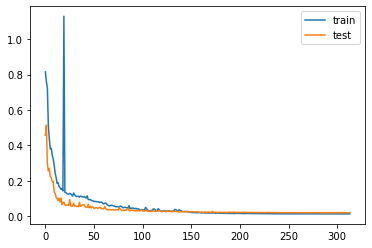

In [72]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [73]:
#make a prediction
yhat = model.predict(test_X)
test_X1 = test_X.reshape(-1,test_X.shape[2])
yhat = yhat.reshape(-1,1)

#invert scaling for forecast
inv_yhat = concatenate((test_X1[:,0:],yhat), axis=1)
inv_yhat = be.inverse_transform(inv_yhat)
inv_yhat[float_col_list] = rbs.inverse_transform(inv_yhat[float_col_list])
inv_yhat = inv_yhat.iloc[:,-1]

# invert scaling for actual
test_y1 = test_y.reshape(-1,1)
test_X1 = test_X.reshape(-1,test_X.shape[2])
inv_y = concatenate((test_X1[:,0:],test_y1), axis=1)
inv_y = be.inverse_transform(inv_y)
inv_y[float_col_list] = rbs.inverse_transform(inv_y[float_col_list])
inv_y = inv_y.iloc[:,-1]

In [78]:
inv_yhat

0         7966.741248
1         7846.449359
2         7010.890448
3         7863.731169
4         6545.021021
             ...     
141982      -0.348905
141983       0.014609
141984      -0.151806
141985      -0.332429
141986      -0.137900
Name: time_req_to_close, Length: 141987, dtype: float64

In [75]:
# calculate RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1442.785


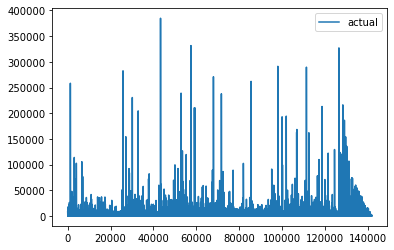

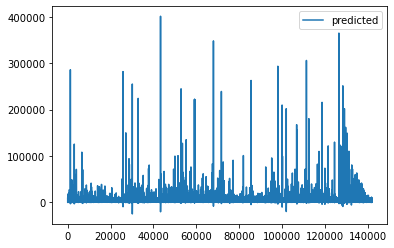

In [76]:
pyplot.plot(inv_y, label='actual')
pyplot.legend()
pyplot.show()

pyplot.plot(inv_yhat, label='predicted')
pyplot.legend()
pyplot.show()